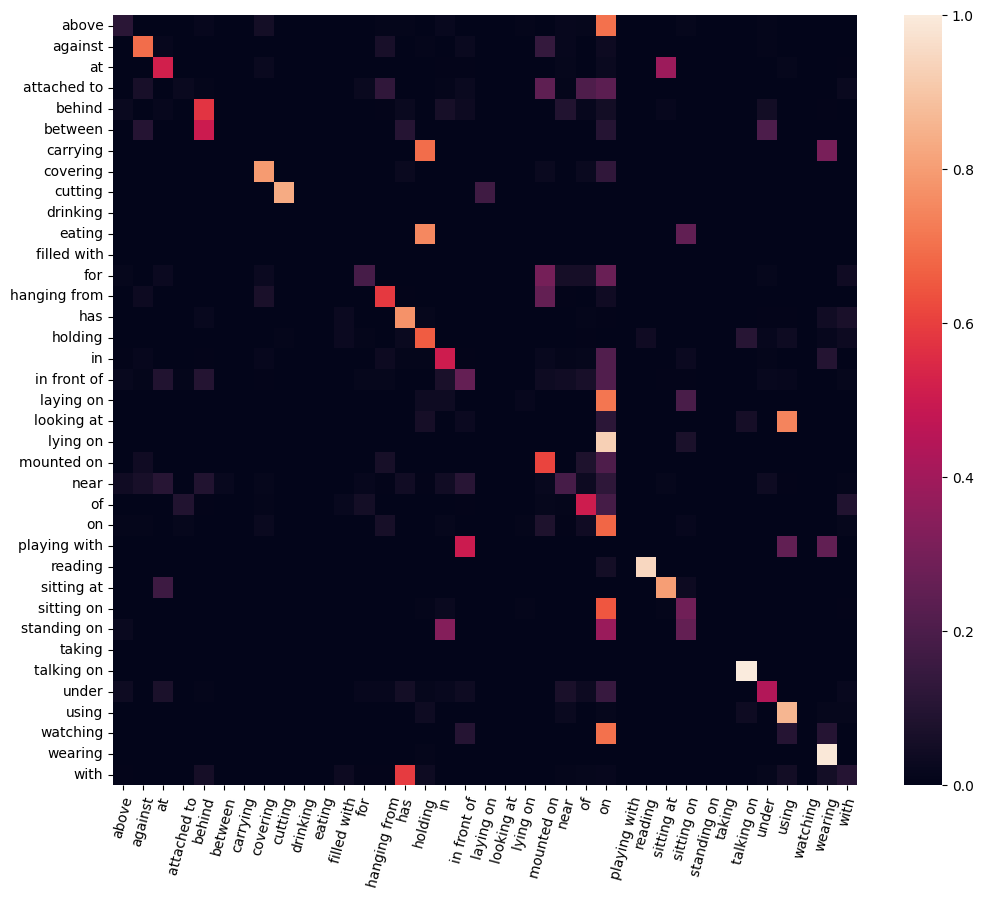

In [ ]:
pred_path = "./n"

class_names = {"1": "above", "2": "against", "3": "at", "4": "attached to", "5": "behind", "6": "between", "7": "carrying", "8": "covering", "9": "cutting", "10": "drinking", "11": "eating", "12": "filled with", "13": "for", "14": "hanging from", "15": "has", "16": "holding", "17": "in", "18": "in front of", "19": "laying on", "20": "looking at", "21": "lying on", "22": "mounted on", "23": "near", "24": "of", "25": "on", "26": "playing with", "27": "reading", "28": "sitting at", "29": "sitting on", "30": "standing on", "31": "taking", "32": "talking on", "33": "under", "34": "using", "35": "watching", "36": "wearing", "37": "with"}

import json

with open(pred_path, 'r') as f:
    data = json.load(f)

pred_data = data['pred_matrix']
gt_data = data['gt_matrix']

# flatten the data
pred_data = [item for sublist in pred_data for item in sublist]
gt_data = [item for sublist in gt_data for item in sublist]

# convert class names to class indices

for i in range(len(pred_data)):
    pred_data[i] = class_names[str(pred_data[i])]
    gt_data[i] = class_names[str(gt_data[i])]
# compute confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(gt_data, pred_data, labels=list(class_names.values()), normalize='true')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, xticklabels=list(class_names.values()), yticklabels=list(class_names.values()))
# y label being rotated 75
plt.xticks(rotation=75)
plt.show()


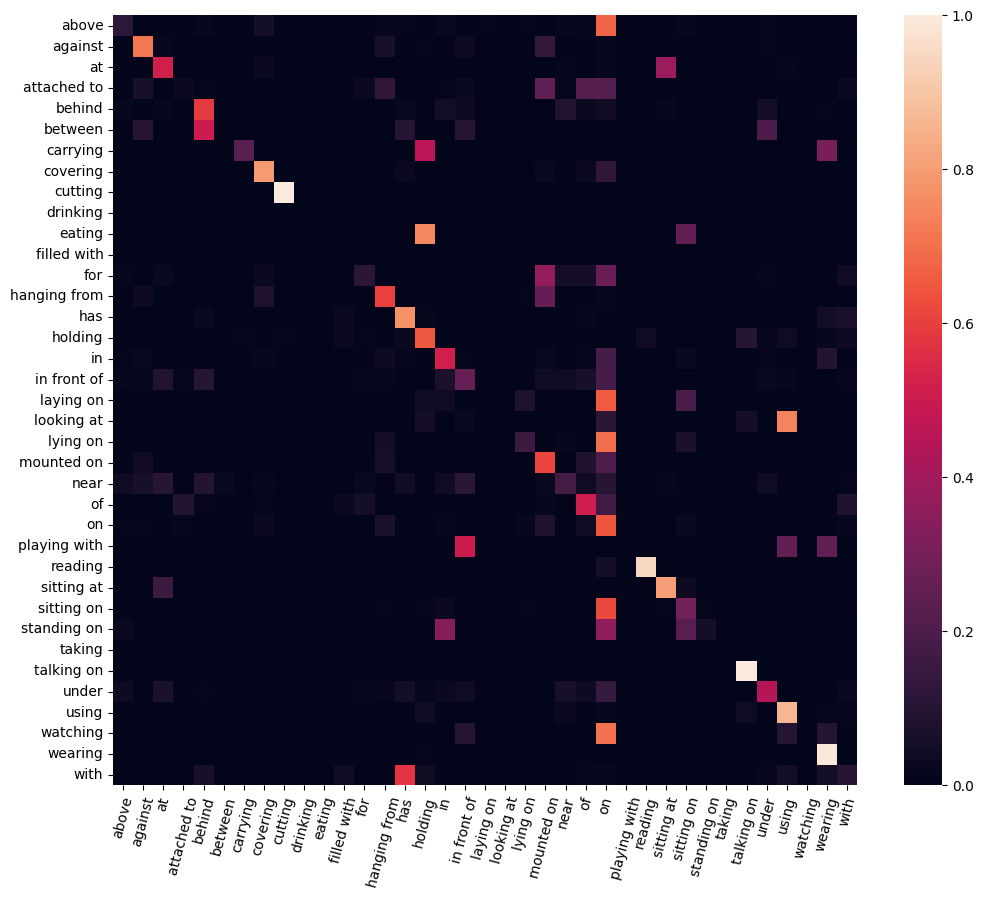

In [ ]:
pred_path = "./checkpoints/IndoorVG4/Expe_union/penet-yolov8l-spatial/inference_80/eval_conf_matrix.json"

class_names = {"1": "above", "2": "against", "3": "at", "4": "attached to", "5": "behind", "6": "between", "7": "carrying", "8": "covering", "9": "cutting", "10": "drinking", "11": "eating", "12": "filled with", "13": "for", "14": "hanging from", "15": "has", "16": "holding", "17": "in", "18": "in front of", "19": "laying on", "20": "looking at", "21": "lying on", "22": "mounted on", "23": "near", "24": "of", "25": "on", "26": "playing with", "27": "reading", "28": "sitting at", "29": "sitting on", "30": "standing on", "31": "taking", "32": "talking on", "33": "under", "34": "using", "35": "watching", "36": "wearing", "37": "with"}

import json

with open(pred_path, 'r') as f:
    data = json.load(f)

pred_data = data['pred_matrix']
gt_data = data['gt_matrix']

# flatten the data
pred_data = [item for sublist in pred_data for item in sublist]
gt_data = [item for sublist in gt_data for item in sublist]

# convert class names to class indices

for i in range(len(pred_data)):
    pred_data[i] = class_names[str(pred_data[i])]
    gt_data[i] = class_names[str(gt_data[i])]
# compute confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(gt_data, pred_data, labels=list(class_names.values()), normalize='true')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, xticklabels=list(class_names.values()), yticklabels=list(class_names.values()))
# y label being rotated 75
plt.xticks(rotation=75)
plt.show()


/tmp/ipykernel_20615/3738999342.py:3: RuntimeWarning: invalid value encountered in divide
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


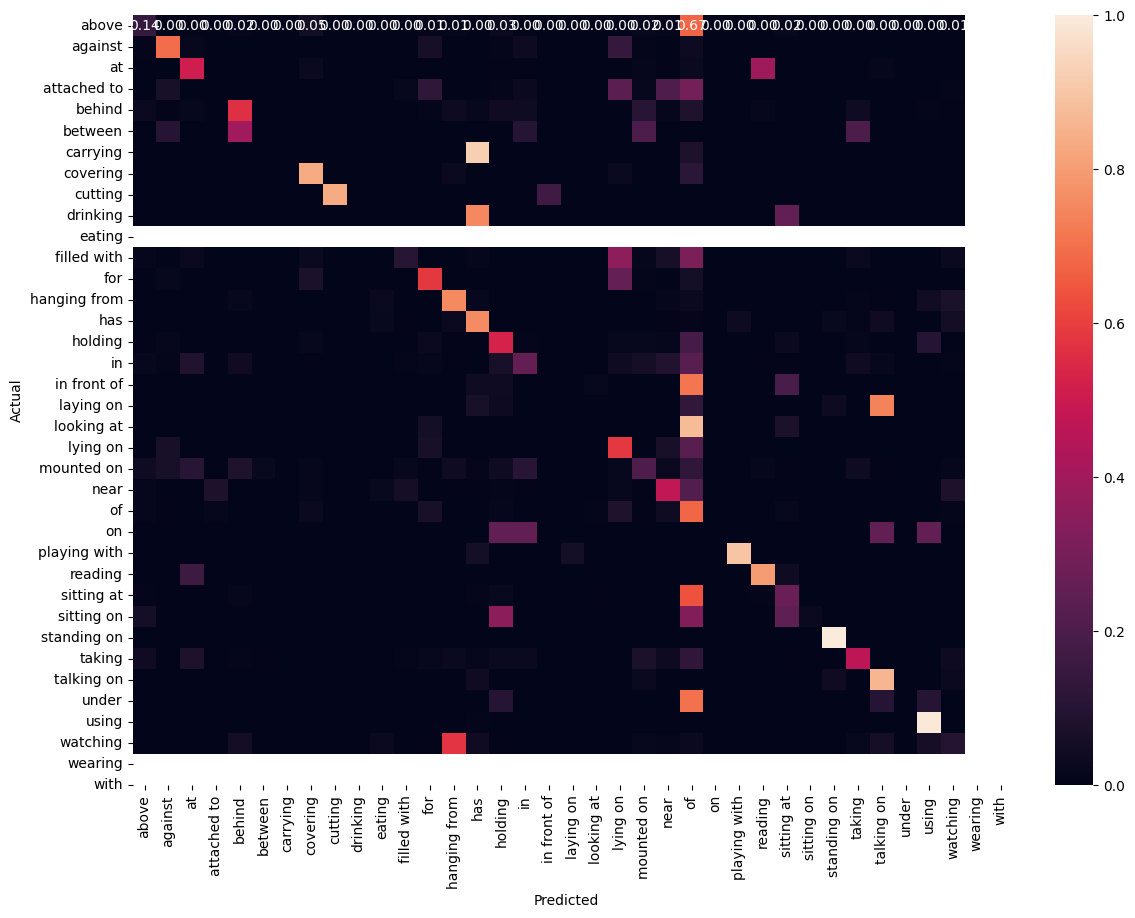

In [2]:
cm = confusion_matrix(gt_data, pred_data)
target_names = list(class_names.values())
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [4]:
# print the most confused classes
conf_matrix = conf_matrix.astype(float)
np.fill_diagonal(conf_matrix, 0)
conf_matrix = np.divide(conf_matrix, np.sum(conf_matrix, axis=1)[:, None])

confusion_dict = {}
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        confusion_dict[(list(class_names.values())[i], list(class_names.values())[j])] = conf_matrix[i, j]

confusion_dict = {k: v for k, v in sorted(confusion_dict.items(), key=lambda item: item[1], reverse=True)}

for k, v in confusion_dict.items():
    print(k, v)
    if v < 0.1:
        break




('cutting', 'laying on') 1.0
('sitting at', 'at') 1.0
('covering', 'on') 0.8571428571428571
('at', 'sitting at') 0.825
('above', 'on') 0.7789046653144017
('carrying', 'holding') 0.75
('hanging from', 'mounted on') 0.625
('between', 'behind') 0.6
('against', 'mounted on') 0.48275862068965525
('attached to', 'of') 0.31521739130434784
('behind', 'near') 0.2788461538461539
('attached to', 'mounted on') 0.2717391304347826
('carrying', 'with') 0.25
('against', 'hanging from') 0.24137931034482762
('behind', 'on') 0.22115384615384617
('against', 'in front of') 0.1724137931034483
('covering', 'with') 0.14285714285714285
('between', 'against') 0.13333333333333333
('between', 'in front of') 0.13333333333333333
('attached to', 'on') 0.10869565217391304
('attached to', 'against') 0.09782608695652173


/tmp/ipykernel_75377/1122511513.py:4: RuntimeWarning: invalid value encountered in divide
  conf_matrix = np.divide(conf_matrix, np.sum(conf_matrix, axis=1)[:, None])
